# **PANDAS** vs. **POLARS**

## Preface

This **React** web application transforms a Jupyter notebook into a static HTML website, simultaneously generating a README markdown file that is easily readable on Github.
Despite its static nature, this is not a server-less application. To deploy it, run the following commands:
```
node server/server.js
npm start
```

## Introduction

**Pandas** is a cornerstone in the Python data science ecosystem. Its DataFrame structure has become synonymous with tabular data manipulation in Python. However, with the evolution of data science and the increasing sizes of datasets, there has been a push for more performant libraries. This is where **polars** comes into the picture.

**Polars** is a DataFrame library that's Rust-based, giving it a significant performance boost. Rust's memory-safety guarantees, along with its speed, make it an ideal choice for such data-intensive libraries.

In this notebook, we'll undertake a comprehensive comparison of these two powerful libraries. For that, we will overview:
* Their **syntax**
* Their **performance**
* Their **memory usage**

### Setup

In [ ]:
import io
import sys
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Creation

For our evaluation, we'll use a dataset with 10 million rows, encompassing numerical data, dates, categories, and string data:

In [ ]:
size = 10**7
dates = pd.date_range('20200101', periods=size, freq='T')
categories = ['A', 'B', 'C', 'D', 'E']
strings = ['foo', 'bar', 'baz', 'qux', 'quux']

df_pandas = pd.DataFrame({
    'date': dates, 
    'value1': np.random.randn(size),
    'value2': np.random.rand(size),
    'category': np.random.choice(categories, size),
    'strings': np.random.choice(strings, size)
})

df_polars = pl.DataFrame({
    'date': dates, 
    'value1': np.random.randn(size),
    'value2': np.random.rand(size),
    'category': np.random.choice(categories, size),
    'strings': np.random.choice(strings, size)
})

## Syntax Comparison
### Selection

In [ ]:
# pandas
df_pandas[['date', 'value1', 'category']]

# polars
df_polars.select(['date', 'value1', 'category'])

date,value1,category
datetime[ns],f64,str
2020-01-01 00:00:00,-1.660257,"""D"""
2020-01-01 00:01:00,-0.583535,"""C"""
2020-01-01 00:02:00,0.414002,"""E"""
2020-01-01 00:03:00,1.647009,"""C"""
2020-01-01 00:04:00,0.646135,"""D"""
2020-01-01 00:05:00,0.865287,"""D"""
2020-01-01 00:06:00,-0.564416,"""B"""
2020-01-01 00:07:00,-0.051554,"""D"""
2020-01-01 00:08:00,-0.89351,"""C"""


### Filtering

In [ ]:
# pandas
df_pandas[df_pandas['value1'] > 0.5]

# polars
df_polars.filter(df_polars['value1'] > 0.5)

date,value1,value2,category,strings
datetime[ns],f64,f64,str,str
2020-01-01 00:03:00,1.647009,0.829525,"""C""","""qux"""
2020-01-01 00:04:00,0.646135,0.080701,"""D""","""baz"""
2020-01-01 00:05:00,0.865287,0.302995,"""D""","""foo"""
2020-01-01 00:17:00,0.759477,0.782525,"""A""","""quux"""
2020-01-01 00:18:00,1.497432,0.295881,"""D""","""qux"""
2020-01-01 00:19:00,0.733474,0.839076,"""D""","""quux"""
2020-01-01 00:20:00,1.64138,0.873472,"""A""","""quux"""
2020-01-01 00:21:00,0.515361,0.242656,"""C""","""quux"""
2020-01-01 00:25:00,1.864133,0.678871,"""C""","""baz"""


### Grouping and Aggregation

In [ ]:
# pandas
df_pandas.groupby('category').agg({'value1': 'mean'})

# polars
df_polars.group_by('category').agg(pl.col('value1').mean().alias('mean_value'))

category,mean_value
str,f64
"""D""",0.000436
"""B""",-0.000231
"""C""",-0.000065
"""E""",0.000582
"""A""",0.000854


## Sorting

In [ ]:
# pandas
df_pandas.sort_values(by='value1')

# polars
df_polars.sort(by='value1')

date,value1,value2,category,strings
datetime[ns],f64,f64,str,str
2022-07-15 13:23:00,-5.831549,0.041652,"""A""","""baz"""
2033-07-08 06:14:00,-5.186498,0.635022,"""A""","""quux"""
2029-12-21 11:18:00,-5.143923,0.078158,"""C""","""qux"""
2031-01-02 18:08:00,-5.121641,0.965643,"""E""","""qux"""
2031-06-18 07:58:00,-5.113963,0.099104,"""D""","""foo"""
2034-09-28 17:01:00,-5.094482,0.978462,"""E""","""bar"""
2033-05-09 13:01:00,-5.085646,0.640827,"""C""","""qux"""
2034-01-03 01:25:00,-4.992672,0.417587,"""C""","""foo"""
2021-03-03 00:48:00,-4.954376,0.79567,"""A""","""baz"""


## Performance Comparison

We will now compare the time each library takes to complete a few common operations. However, let's first define two relevant functions:
* **capture_time**: measures, saves, and prints the computing time that a given/input function has taken to complete.
* **comparative_plot**: as its name suggests, this function creates a boxplot comparing the timings/performance of **pandas** and **polars**.

In [ ]:
def capture_time(function, label):
    """
    Capture the output of the timeit magic function.
    Arguments:
    - code_str: the code to time.
    - label: the label to prepend to the printed output.
    
    Returns:
    - result: the result of the %timeit magic function (an instance of timeit's TimeitResult)
    """
    # Execute the code and get the %timeit result object
    result = get_ipython().run_line_magic('timeit', '-o -q ' + function)
    
    # Print the custom formatted string
    mean_time = result.best * 1e3  # Convert to ms
    std_dev = (result.stdev * 1e3) / (result.loops**0.5)  # Standard error of the mean
    print(f"{label}: {mean_time:.2f} ms ± {std_dev:.2f} ms per loop (mean ± std. dev. of {result.repeat} runs, {result.loops} loops each)")
    
    return result

def comparative_plot(time_pandas, time_polars, process_name):
    # Convert from seconds to milliseconds for better readability
    time_pandas = [run / time_pandas.loops * 1e3 for run in time_pandas.all_runs]
    time_polars = [run / time_polars.loops * 1e3 for run in time_polars.all_runs]

    # Data
    data = time_pandas + time_polars
    labels = ['pandas'] * len(time_pandas) + ['polars'] * len(time_polars)

    # Create DataFrame
    df = pd.DataFrame({'Time (ms)': data, 'Library': labels})

    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Library', y='Time (ms)', data=df, width=0.5)

    # Titles
    title = "Performance Comparison: " + process_name
    plt.title(title, fontsize=16, pad=15)  # pad to adjust distance of title from plot
    plt.suptitle("Each value is derived from 7 runs, 10 loops each", y=0.94, fontsize=10, color='grey')  # y to adjust subtitle

    # Adjusting layout
    plt.tight_layout()  # Auto adjust layout

    # Adjusting plot's position
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)  # Adjusting margins for the figure

    plt.show()

### Filtering

pandas: 173.93 ms ± 3.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
polars: 86.46 ms ± 0.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


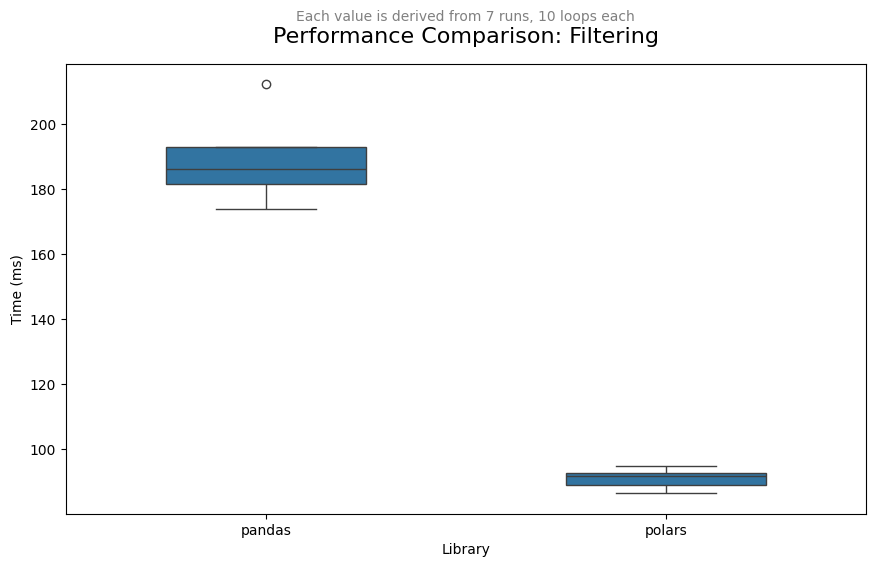

In [ ]:
def filter_pandas():
    return df_pandas[df_pandas['value1'] > 0.5]

def filter_polars():
    return df_polars.filter(df_polars['value1'] > 0.5)

time_pandas_filter = capture_time('filter_pandas()', 'pandas')
time_polars_filter = capture_time('filter_polars()', 'polars')

comparative_plot(time_pandas_filter, time_polars_filter, "Filtering")

### Grouping and Aggregation

pandas: 311.15 ms ± 6.93 ms per loop (mean ± std. dev. of 7 runs, 1 loops each)
polars: 121.91 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


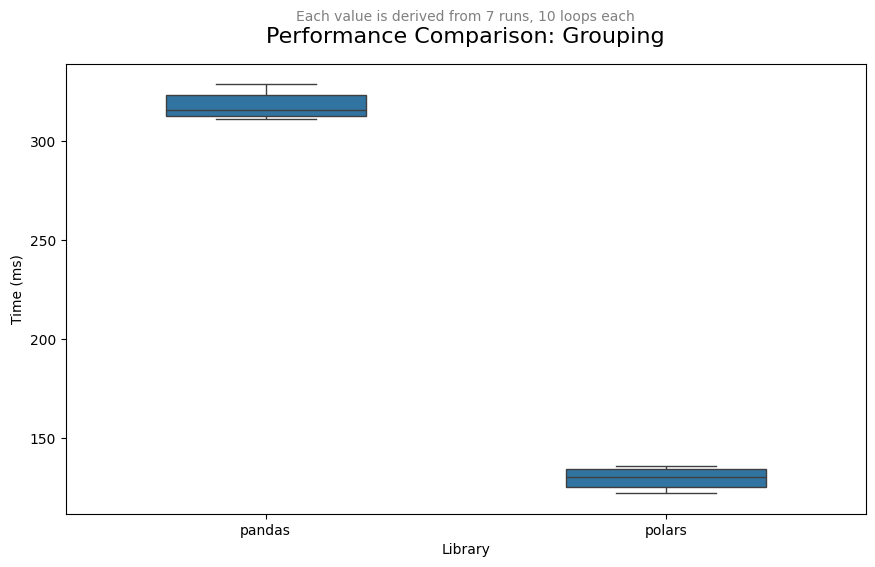

In [ ]:
def group_pandas():
    return df_pandas.groupby('category').agg({'value1': 'mean'})

def group_polars():
    return df_polars.group_by('category').agg(pl.col('value1').mean().alias('mean_value'))

time_pandas_group = capture_time('group_pandas()', 'pandas')
time_polars_group = capture_time('group_polars()', 'polars')

comparative_plot(time_pandas_group, time_polars_group, "Grouping")

### Sorting

pandas: 2899.04 ms ± 98.93 ms per loop (mean ± std. dev. of 7 runs, 1 loops each)
polars: 560.89 ms ± 43.37 ms per loop (mean ± std. dev. of 7 runs, 1 loops each)


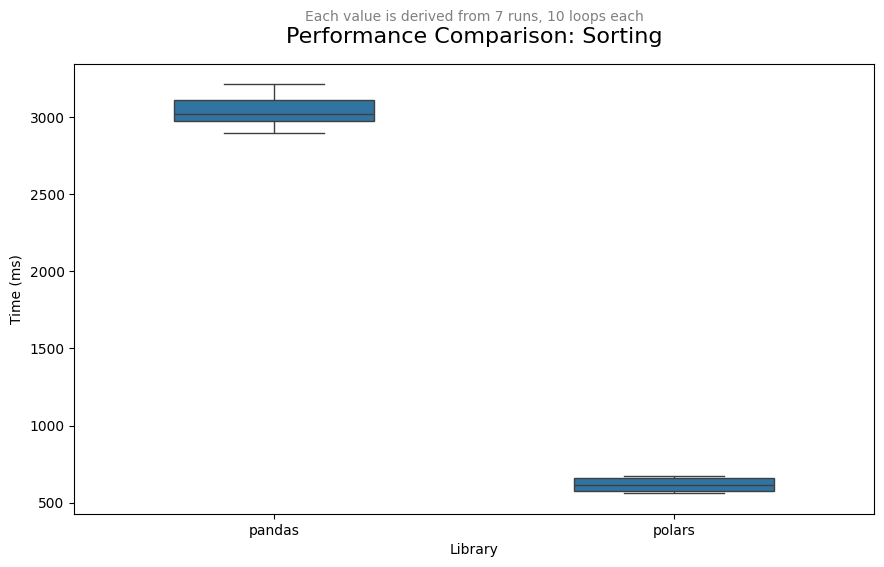

In [ ]:
def sort_pandas():
    return df_pandas.sort_values(by='value1')

def sort_polars():
    return df_polars.sort(by='value1')

time_pandas_sort = capture_time('sort_pandas()', 'pandas')
time_polars_sort = capture_time('sort_polars()', 'polars')

comparative_plot(time_pandas_sort, time_polars_sort, "Sorting")

## Memory Usage

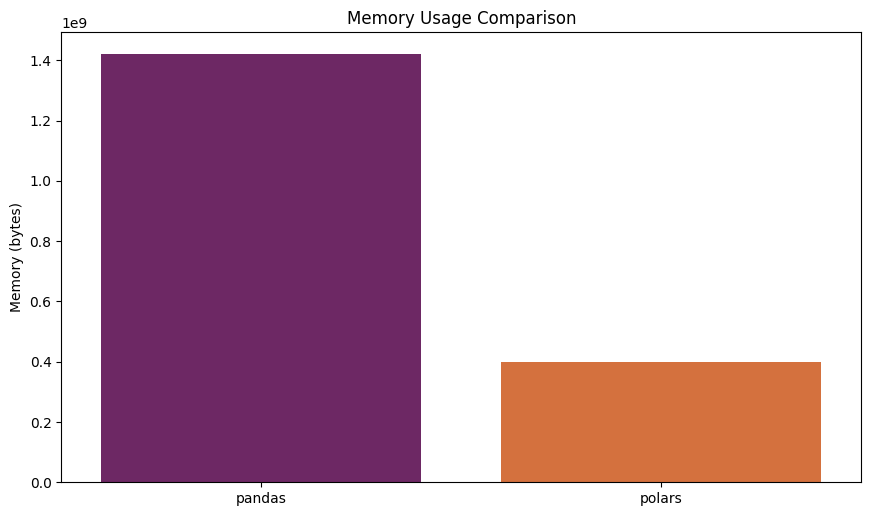

In [ ]:
import sys
pandas_memory = sys.getsizeof(df_pandas)
polars_memory = sum([df_polars[col].to_numpy().nbytes for col in df_polars.columns])

labels = ['pandas', 'polars']
memory = [pandas_memory, polars_memory]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=memory, palette="inferno", hue=labels, legend=False)

# Titles
plt.title('Memory Usage Comparison')
plt.ylabel('Memory (bytes)')

# Adjusting layout
plt.tight_layout()  # Auto adjust layout

# Adjusting plot's position
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)  # Adjusting margins for the figure

plt.show()

## Conclusion

* **Syntax**: While **pandas** and **polars** share many similarities in terms of syntax, especially because they're both built around the DataFrame concept, there are differences. The method names and how they're invoked (e.g., chaining in polars) can differ.

* **Performance**: As demonstrated, **polars** tends to perform faster for certain operations, especially as the size of the data grows. This is largely attributed to its Rust backend, optimized for performance.

* **Memory**: Memory consumption is crucial, especially for larger datasets. As we can observe, the memory footprint can differ between the two, with **polars** typically being more efficient due to its memory-safe Rust backend.

Ultimately, the choice between **pandas** and **polars** should be based on the specific needs of your project. While **pandas** boasts extensive documentation and a larger community, **polars** offers speed and efficiency advantages that could be decisive, especially for more extensive datasets. Consider the trade-offs and choose wisely!